In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import math
import random
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [2]:
data_df = pd.DataFrame(pd.read_csv('Air Quality .csv', index_col = 0))
db = pd.read_csv('forestfires.csv')

In [3]:
iris = sns.load_dataset('iris')

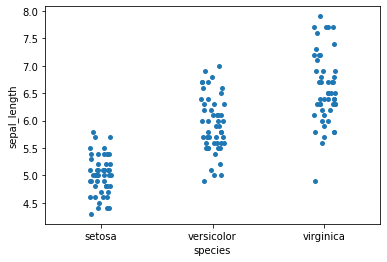

In [4]:
ax = sns.stripplot(x='species', y='sepal_length', data=iris)

Text(0.5, 1.0, 'Graph')

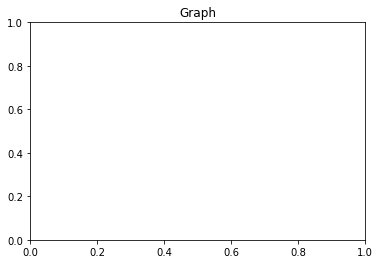

In [5]:
plt.title('Graph')

In [6]:
plt.show()

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
db.head()

In [ ]:
data_df.head()

In [ ]:

data_df['datetime'] = pd.to_datetime(data_df[['year', 'month','day', 'hour']])
data_df = data_df.drop(['year', 'month','day', 'hour'], axis = 1)


In [ ]:
data_df = data_df[['datetime', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'pm2.5']].iloc[24:].reset_index().drop('No', axis = 1)
data_df[['pm2.5']] = data_df[['pm2.5']].interpolate(method='linear')

In [ ]:
data_df.isnull().sum()

In [ ]:
len(data_df)

In [ ]:
sns.set(style="whitegrid")
ax = data_df['pm2.5'].plot.hist(bins = 200, figsize = (12,8))

In [ ]:
ax = data_df.plot(x = 'datetime', y = 'pm2.5', figsize = (12,8))

In [ ]:
data_df[['pm2.5']].mean()

In [ ]:
from sklearn.model_selection import train_test_split

data_df = data_df.set_index('datetime')
X_train, X_test, y_train, y_test = train_test_split(data_df[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']], data_df[['pm2.5']], test_size=0.2)

In [ ]:
import statsmodels.api as sm
import numpy as np

model = sm.OLS(np.asarray(y_train), np.asarray(X_train))
results = model.fit()
print(results.summary())

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = results.predict(np.asarray(X_test))
mse = mean_squared_error(np.asarray(y_test), y_pred)
rmse = mse**0.5
print(rmse)

In [ ]:
data_df = data_df.reset_index()
six_df = pd.DataFrame()
twelve_df = pd.DataFrame()
tf_df = pd.DataFrame()
for i in range(len(data_df)):
    six_df = pd.concat([six_df,pd.DataFrame({'6hr_avg':[sum(data_df['pm2.5'].iloc[i:i+6])/6]}, index = [i+6])])
    twelve_df = pd.concat([twelve_df,pd.DataFrame({'12hr_avg':[sum(data_df['pm2.5'].iloc[i:i+12])/12]}, index = [i+12])])
    tf_df = pd.concat([tf_df,pd.DataFrame({'24hr_avg':[sum(data_df['pm2.5'].iloc[i:i+24])/24]}, index = [i+24])])
    
data_df = pd.merge(data_df, six_df, left_index=True, right_index=True)
data_df = pd.merge(data_df, twelve_df, left_index=True, right_index=True)
data_df = pd.merge(data_df, tf_df, left_index=True, right_index=True)

data_df = pd.merge(data_df,pd.get_dummies(data_df['cbwd']), left_index=True, right_index=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','6hr_avg', '12hr_avg', '24hr_avg','NE','NW','SE']], data_df[['pm2.5']], test_size=0.2)
#model = sm.OLS(np.asarray(y_train), np.asarray(X_train))
results = model.fit()
print(results.summary())

In [ ]:
from sklearn import tree

In [ ]:
data_df = data_df.reset_index()
X_train, X_test, y_train, y_test = train_test_split(data_df[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','6hr_avg', '12hr_avg', '24hr_avg','NE','NW','SE']], data_df[['pm2.5']], test_size=0.2)


In [ ]:

clf = tree.DecisionTreeRegressor()
clf = clf.fit(np.asarray(X_train), np.asarray(y_train))

In [ ]:

y_pred = clf.predict(np.asarray(X_test))


In [ ]:
mse = mean_squared_error(np.asarray(y_test), y_pred)
rmse = mse**0.5
print(rmse)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

dtest = xgb.DMatrix(X_test, y_test, feature_names=X_test.columns)
dtrain = xgb.DMatrix(X_train, y_train,feature_names=X_train.columns)

param = {'verbosity':1, 
         'objective':'reg:squarederror',     ####'reg:squarederror', 
         'booster':'gblinear',
         'eval_metric' :'rmse',
         'feature_selector': 'cyclic',
         'learning_rate': 1}

evallist = [(dtrain, 'train')]

In [ ]:

num_round = 20
bst = xgb.train(param, dtrain, num_round, evallist)

In [ ]:
mse = mean_squared_error(np.asarray(y_test), y_pred)
rmse = mse**0.5
print(rmse)

In [ ]:


db.info()

In [ ]:

plt.style.use('seaborn')
db.hist(bins=30, figsize=(20,15)) 

In [ ]:

db.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
db.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [ ]:

db.head(10)

In [ ]:

db.corr()

In [ ]:
db.describe()

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(db, test_size=0.2, random_state=42)
work_set = train_set.copy() 

In [ ]:
train_set.head()

In [ ]:
work_set.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300) # scatter plot for the dataset

In [ ]:
work_set.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*work_set['area']) 

In [ ]:

x_values = list(work_set['X'])
y_values = list(work_set['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []
    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)

In [ ]:

def count_points(x_points, y_points, scaling_factor):
    count_array = []
    
    for index in range(0, len(x_points)):
        temp_value = [x_points[index], y_points[index]]
        count = 0
        
        for value in loc_values:
            if(temp_value == value):
                count = count + 1
        count_array.append(count * scaling_factor )

    return count_array

In [ ]:
work_set.head()


In [ ]:

from pandas.plotting import scatter_matrix

attributes = ['RH']
scatter_matrix(work_set[attributes], figsize=(15,10))


In [ ]:

from pandas.plotting import scatter_matrix

attributes = ['temp']
scatter_matrix(work_set[attributes], figsize=(15,10))

In [ ]:

from pandas.plotting import scatter_matrix

attributes = ['DMC']
scatter_matrix(work_set[attributes], figsize=(15,10))

In [ ]:

from pandas.plotting import scatter_matrix

attributes = ['area']
scatter_matrix(work_set[attributes], figsize=(15,10))

In [ ]:
db['month'].unique()

In [ ]:
db['day'].unique()

In [ ]:
db['area'].unique()

In [ ]:

def histogram_plot(db, title):
    plt.figure(figsize=(8, 6))    
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.title(title, fontsize = 22)
    plt.hist(db, edgecolor='black', linewidth=1.2)
    plt.show()

In [ ]:


plt.figure(figsize=(8, 6))    
    
ax = plt.subplot()    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
    
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left() 
    
plt.title("Fire location plot", fontsize = 22)
plt.scatter(x_values, y_values, s = count_points(x_values, y_values, 25), alpha = 0.3)
plt.show()

In [ ]:


from sklearn.preprocessing import LabelEncoder

month_encoder = LabelEncoder()
day_encoder = LabelEncoder()

months = db['month']
days = db['day']

month_1hot = month_encoder.fit_transform(months) 
day_1hot = day_encoder.fit_transform(days) 
month_1hot


In [ ]:
day_1hot


In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = db.drop(['month', 'day'], axis=1)
scaled_features = scaler.fit_transform(numerical_features)

In [ ]:
scaled_features

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

class CustomBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, class_labels):
        self.class_labels = class_labels
    def fit(self, X, y=None,**fit_params):
        return self
    def transform(self, X):
        return MultiLabelBinarizer(classes=self.class_labels).fit_transform(X)

In [ ]:
from sklearn.pipeline import Pipeline


numerical_attributes = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'] 
categorical_attributes = ['month', 'day']
categorical_classes = np.concatenate((db['month'].unique(), db['day'].unique()), axis=0)


numerical_pipeline = Pipeline([
    ('selector', AttributeSelector(numerical_attributes)),
    ('standardize', StandardScaler()),
])
categorical_pipeline = Pipeline([
    ('selector', AttributeSelector(categorical_attributes)),
    ('encode', CustomBinarizer(categorical_classes)),
])

In [ ]:

histogram_plot(db['FFMC'], title = "FFMC distribution")
plt.show()

In [ ]:

histogram_plot(db['DC'], title = "DC distribution")
plt.show()

In [ ]:
X = db.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].values
Y = db.iloc[:, 11].values

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.3, random_state = 9)
mse_values = []
variance_score = []


In [ ]:
train_x


In [ ]:
train_y